# Visualização das análises de sensibilidade
- Notebook dedidado à leitura de arquivos .json resultantes das análises de sensibilidade para cada um dos algoritmos de otimização

In [1]:
# Importa pacotes
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

dict_pso_sens = read_json('simulations/pso_sensitivity.json')

In [3]:
dict_pso_sens[0].keys()

dict_keys(['global_factor', 'local_factor', 'v_max', 'fitness_calls', 'best_ind_list', 'avg_ind_list', 'best_solutions', 'total_time'])

In [12]:
best_ind_array = np.array(dict_pso_sens[1]['best_ind_list'])
avg_ind_array = np.array(dict_pso_sens[1]['avg_ind_list'])

indice = best_ind_array.argmax()
best_ind = best_ind_array[indice]
avg_ind = avg_ind_array[indice]
print(indice, best_ind, avg_ind)

0 0.5 0.3758638208057928


array([0.24198929, 0.23373761, 0.27282028, 0.39862089, 0.34799187,
       0.495     , 0.499     , 0.498     , 0.466     , 0.464     ,
       0.43092915, 0.45129031, 0.473     , 0.497     , 0.31984273,
       0.3402268 , 0.363944  , 0.5       , 0.439     , 0.49797399,
       0.49831812, 0.491     , 0.5       , 0.39788049, 0.45130067,
       0.46362773, 0.5       , 0.5       , 0.48061588, 0.34160873,
       0.4843857 , 0.5       , 0.5       , 0.38859389, 0.3749489 ,
       0.37178564, 0.5       , 0.5       , 0.5       , 0.37753402,
       0.38166094, 0.46277064, 0.455     , 0.5       , 0.46149856,
       0.5       , 0.5       , 0.34235856, 0.5       , 0.49897485,
       0.49601065, 0.5       , 0.5       , 0.5       , 0.43323165,
       0.41782167, 0.49729793, 0.5       , 0.5       , 0.35589607,
       0.36860712, 0.42318915, 0.383     , 0.382     , 0.34184078,
       0.34407111, 0.384     , 0.431     , 0.5       , 0.37519604,
       0.35968033, 0.33891123, 0.451     , 0.5       , 0.43460

In [2]:
class SensVisualizer():
    def __init__(self, file_path:str, parameters:list):
        self.parameters = parameters
        with open(file_path, 'r') as file:
            self.sens_list = json.load(file)
    
    def print_keys(self):
        print(self.sens_list[0].keys())

    def process_json(self):
        processed_list = []
        for sens_dict in self.sens_list:
            dict_filtered = {}
            for parameter in self.parameters:
                dict_filtered[parameter] = sens_dict[parameter]
            if sens_dict['best_ind_list'] != 'ERRO':
                best_ind_array = np.array(sens_dict['best_ind_list'])
                avg_ind_array = np.array(sens_dict['avg_ind_list'])
                max_best_ind_value = best_ind_array.max()
                indices_of_max_best_ind = np.where(best_ind_array == max_best_ind_value)[0]

                if len(indices_of_max_best_ind) > 1:
                    # Selecionar a linha com o maior avg_ind entre as que têm o melhor best_ind
                    max_avg_ind = -np.inf
                    chosen_index = -1
                    for index in indices_of_max_best_ind:
                        if avg_ind_array[index] > max_avg_ind:
                            max_avg_ind = avg_ind_array[index]
                            chosen_index = index
                    best_ind = best_ind_array[chosen_index]
                    avg_ind = avg_ind_array[chosen_index]
                else:
                    # Caso de um único máximo
                    chosen_index = indices_of_max_best_ind[0]
                    best_ind = best_ind_array[chosen_index]
                    avg_ind = avg_ind_array[chosen_index]

                dict_filtered['best_ind'] = best_ind
                dict_filtered['avg_ind'] = avg_ind
                dict_filtered['fitness_calls'] = sens_dict['fitness_calls'][chosen_index]
                dict_filtered['total_time'] = sens_dict['total_time']

            else:
                dict_filtered['best_ind'] = 0
                dict_filtered['avg_ind'] = 0
                dict_filtered['fitness_calls'] = 0
                dict_filtered['total_time'] = 0

            processed_list.append(dict_filtered)

        self.df_sens = pd.DataFrame(processed_list)

    def get_inds(self):
        self.df_best_ind = self.df_sens.loc[self.df_sens['best_ind'] == self.df_sens['best_ind'].max()]
        self.df_avg_ind = self.df_sens.loc[self.df_sens['avg_ind'] == self.df_sens['avg_ind'].max()]
    
    def display_all(self):
        self.process_json()
        self.get_inds()
        print("Tabela de sensibilidade:")
        display(self.df_sens)

        print("Melhor indivíduo")
        display(self.df_best_ind)

        print("Melhor indivíduo médio")
        display(self.df_avg_ind)

        dict_params = {}
        for parameter in self.parameters:
            dict_params[parameter] = self.df_sens[parameter].unique()
        print("Parâmetros")
        print(dict_params)
        
path = 'simulations/cmaes_sensitivity.json'
parameters = ['mi', 'sigma']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.process_json()


# PSO

In [10]:
path = 'simulations/pso_sensitivity.json'
parameters = ['global_factor', 'local_factor', 'v_max']
viz_pso = SensVisualizer(file_path=path, parameters=parameters)
viz_pso.display_all()
df_sens_pso = viz_pso.df_sens

df_sens_pso_csv = df_sens_pso.copy(deep=True)
# Trunca até 3 casas decimais
df_sens_pso_csv['best_ind'] = df_sens_pso_csv['best_ind'].apply(lambda x: round(x, 3))
df_sens_pso_csv['avg_ind'] = df_sens_pso_csv['avg_ind'].apply(lambda x: round(x, 3))
df_sens_pso_csv['fitness_calls'] = df_sens_pso_csv['fitness_calls'].astype(int)
df_sens_pso_csv['total_time'] = df_sens_pso_csv['total_time'].apply(lambda x: round(x, 3))
df_sens_pso_csv.to_csv('processed_tables/pso_sensitivity.csv', index=False)


Tabela de sensibilidade:


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,1.00,0.638526,0.500139,87.0,69.537304
1,3.5,1.0,3.25,0.621152,0.589731,100.0,63.303190
2,3.5,1.0,5.50,0.568837,0.244429,1.0,99.922402
3,3.5,1.0,7.75,0.568837,0.244429,1.0,100.424914
4,3.5,1.0,10.00,0.568837,0.244429,1.0,99.563831
...,...,...,...,...,...,...,...
105,6.0,6.0,1.00,0.619349,0.490645,57.0,78.819321
106,6.0,6.0,3.25,0.617325,0.527085,54.0,90.085258
107,6.0,6.0,5.50,0.625997,0.469666,100.0,83.898343
108,6.0,6.0,7.75,0.624032,0.441257,56.0,87.578920


Melhor indivíduo


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
18,2.25,2.25,7.75,0.698669,0.623898,100.0,69.564799


Melhor indivíduo médio


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
27,4.75,2.25,5.5,0.692197,0.682234,100.0,65.798818


Parâmetros
{'global_factor': array([3.5 , 4.75, 6.  , 2.25, 1.  ]), 'local_factor': array([1.  , 2.25, 3.5 , 4.75, 6.  ]), 'v_max': array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])}


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,1.00,0.638526,0.500139,87.0,69.537304
1,3.5,1.0,3.25,0.621152,0.589731,100.0,63.303190
2,3.5,1.0,5.50,0.568837,0.244429,1.0,99.922402
3,3.5,1.0,7.75,0.568837,0.244429,1.0,100.424914
4,3.5,1.0,10.00,0.568837,0.244429,1.0,99.563831
...,...,...,...,...,...,...,...
105,6.0,6.0,1.00,0.619349,0.490645,57.0,78.819321
106,6.0,6.0,3.25,0.617325,0.527085,54.0,90.085258
107,6.0,6.0,5.50,0.625997,0.469666,100.0,83.898343
108,6.0,6.0,7.75,0.624032,0.441257,56.0,87.578920


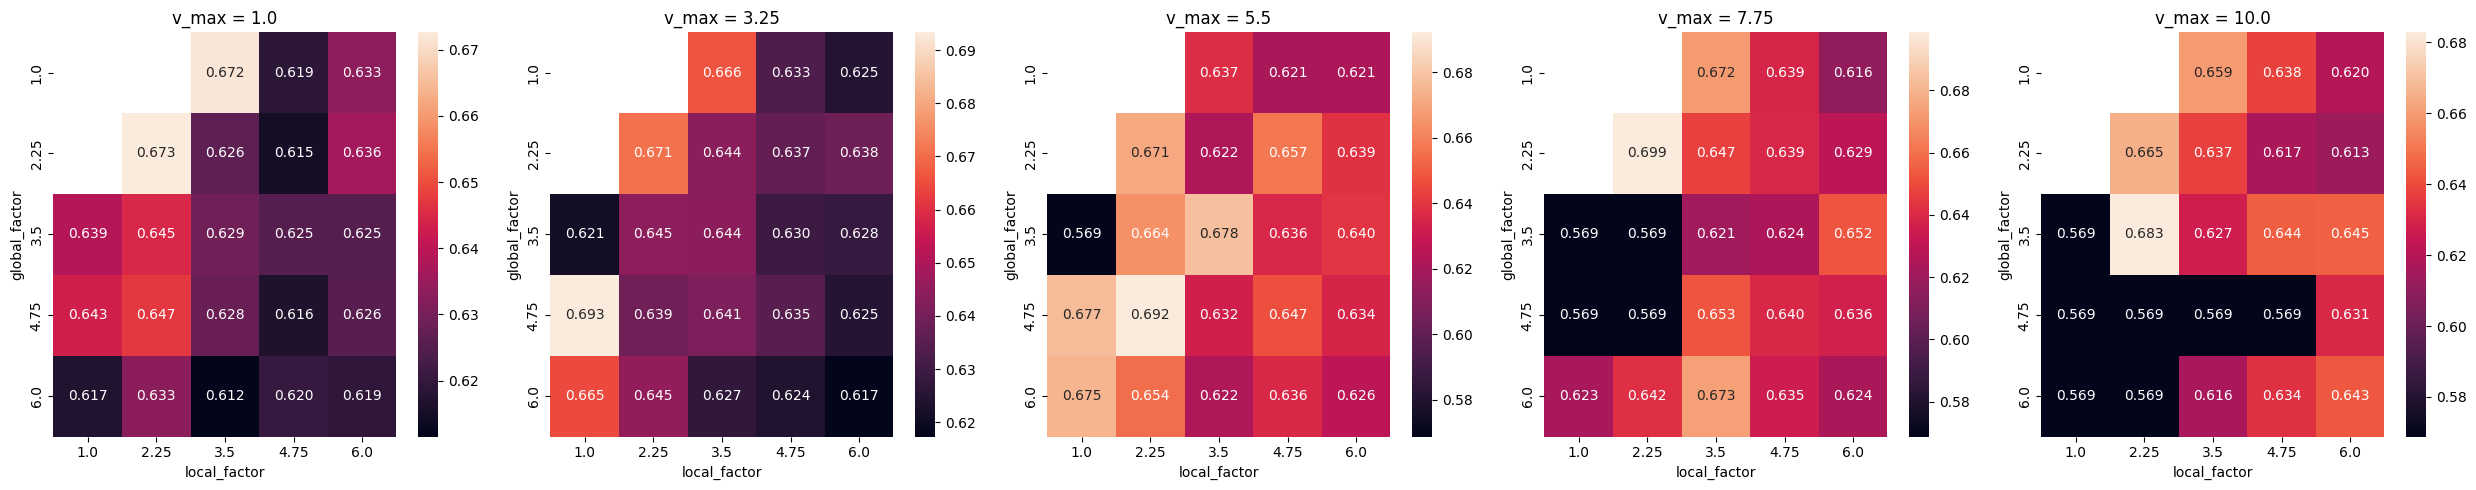

In [11]:
def plot_graph_pso(df, nom_x, nom_y, nom_z):
    list_graficos = []
    display(df)
    list_z = df[nom_z].unique()

    numero_plots = len(list_z)
    fig, axes = plt.subplots(1, numero_plots, figsize=(25, 5))  # Ajuste o tamanho conforme necessário
    iter_counter = 0
    for z in list_z:
        eixo_x = df.loc[df[nom_z] == z, nom_x]
        eixo_y = df.loc[df[nom_z] == z, nom_y]
        fitness = df.loc[df[nom_z] == z, 'best_ind']
        dict_grafico = {
            nom_x: eixo_x,
            nom_y: eixo_y,
            nom_z: z,
            'fitness': fitness
        }
        list_graficos.append(dict_grafico)

        df_filtrado = pd.DataFrame(dict_grafico)
        df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
        sns.heatmap(data=df_pivot, ax=axes[iter_counter], annot=True, fmt=".3f")
        axes[iter_counter].set_title(f'{nom_z} = {z}')

        iter_counter += 1
    # Ajuste o espaçamento entre os subplots
    plt.tight_layout()

    # Exiba o gráfico
    plt.show()


plot_graph_pso(df_sens_pso, 'global_factor', 'local_factor', 'v_max')

,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,1.00,0.638526,0.500139,87.0,69.537304
1,3.5,1.0,3.25,0.621152,0.589731,100.0,63.303190
2,3.5,1.0,5.50,0.568837,0.244429,1.0,99.922402
3,3.5,1.0,7.75,0.568837,0.244429,1.0,100.424914
4,3.5,1.0,10.00,0.568837,0.244429,1.0,99.563831
...,...,...,...,...,...,...,...
105,6.0,6.0,1.00,0.619349,0.490645,57.0,78.819321
106,6.0,6.0,3.25,0.617325,0.527085,54.0,90.085258
107,6.0,6.0,5.50,0.625997,0.469666,100.0,83.898343
108,6.0,6.0,7.75,0.624032,0.441257,56.0,87.578920


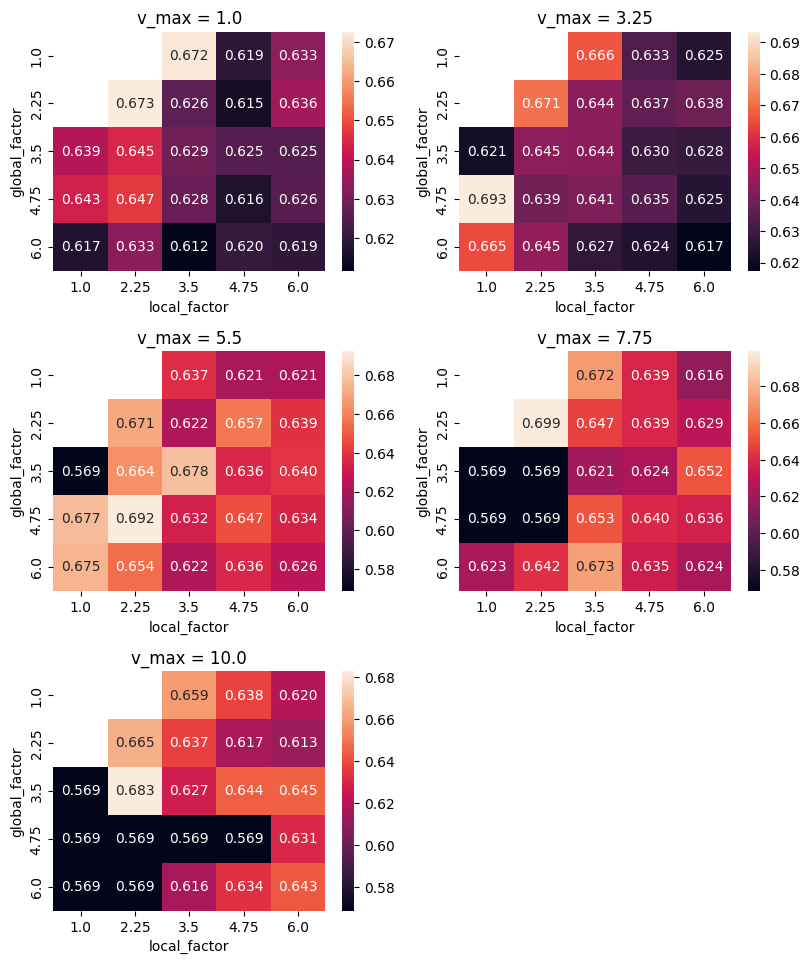

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_graph_pso(df, nom_x, nom_y, nom_z):
    list_graficos = []
    display(df)
    list_z = df[nom_z].unique()

    numero_plots = len(list_z)

    # Definindo o número de linhas e colunas
    cols = 2  # Máximo de 3 plots por linha
    rows = 3  # Duas linhas para acomodar todos os 5 plots

    # Calculando a largura e a altura da figura
    largura_figura = 21  # Largura total em cm
    altura_figura = (29.7 / rows) * (numero_plots / cols)  # Altura proporcional

    # Criando a figura com o layout ajustado
    fig, axes = plt.subplots(rows, cols, figsize=(largura_figura / 2.54, altura_figura / 2.54))

    # Preenchendo cada subplot
    for i, z in enumerate(list_z):
        row, col = divmod(i, cols)
        eixo_x = df.loc[df[nom_z] == z, nom_x]
        eixo_y = df.loc[df[nom_z] == z, nom_y]
        fitness = df.loc[df[nom_z] == z, 'best_ind']
        dict_grafico = {
            nom_x: eixo_x,
            nom_y: eixo_y,
            nom_z: z,
            'fitness': fitness
        }
        list_graficos.append(dict_grafico)

        df_filtrado = pd.DataFrame(dict_grafico)
        df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
        sns.heatmap(data=df_pivot, ax=axes[row, col], annot=True, fmt=".3f")
        axes[row, col].set_title(f'{nom_z} = {z}')

    # Ajustando espaçamento e removendo subplots não utilizados
    for ax in axes.flat[numero_plots:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

# Exemplo de uso
plot_graph_pso(df_sens_pso, 'global_factor', 'local_factor', 'v_max')


- Resultados parecem ser melhores na diagonal superior de global_factor 3.5 a 1.
- Valores do topo nao existem por conta da restrição global_factor + local_factor > 2

# Evolução Diferencial

In [7]:
path = 'simulations/de_sensitivity.json'
parameters = ['mutation_rate', 'crossover_rate']
viz = SensVisualizer(file_path=path, parameters=parameters)
# ERREI NO NOME 
# global_factor = mutation_rate 
# local_factor = crossover_rate
viz.display_all()
#rename_dict = {'global_factor': 'mutation_rate', 'local_factor': 'crossover_rate'}
#viz.df_sens.rename(columns=rename_dict, inplace=True)
df_sens_de = viz.df_sens


Tabela de sensibilidade:


,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
0,0.1,0.1,0.634018,0.423581,200.0,207.241674
1,0.2,0.1,0.633987,0.474640,200.0,198.738935
2,0.3,0.1,0.620029,0.494342,200.0,193.418535
3,0.4,0.1,0.615365,0.505354,200.0,191.989191
4,0.5,0.1,0.622606,0.506917,200.0,189.424321
...,...,...,...,...,...,...
95,0.6,1.0,0.672921,0.483990,200.0,192.765502
96,0.7,1.0,0.665204,0.486946,200.0,192.420726
97,0.8,1.0,0.668480,0.491901,200.0,190.052719
98,0.9,1.0,0.646367,0.490264,200.0,189.163195


Melhor indivíduo


,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
95,0.6,1.0,0.672921,0.48399,200.0,192.765502


Melhor indivíduo médio


,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
9,1.0,0.1,0.612813,0.509475,200.0,187.310444


Parâmetros
{'mutation_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'crossover_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}


In [13]:
df_sens_de_csv = df_sens_de.copy(deep=True)
# Trunca até 3 casas decimais
df_sens_de_csv['best_ind'] = df_sens_de_csv['best_ind'].apply(lambda x: round(x, 3))
df_sens_de_csv['avg_ind'] = df_sens_de_csv['avg_ind'].apply(lambda x: round(x, 3))
df_sens_de_csv['fitness_calls'] = df_sens_de_csv['fitness_calls'].astype(int)
df_sens_de_csv['total_time'] = df_sens_de_csv['total_time'].apply(lambda x: round(x, 3))
df_sens_de_csv['crossover_rate'] = df_sens_de_csv['crossover_rate'].apply(lambda x: round(x, 1))
df_sens_de_csv['mutation_rate'] = df_sens_de_csv['mutation_rate'].apply(lambda x: round(x, 1))
df_sens_de_csv.to_csv('processed_tables/de_sensitivity.csv', index=False)



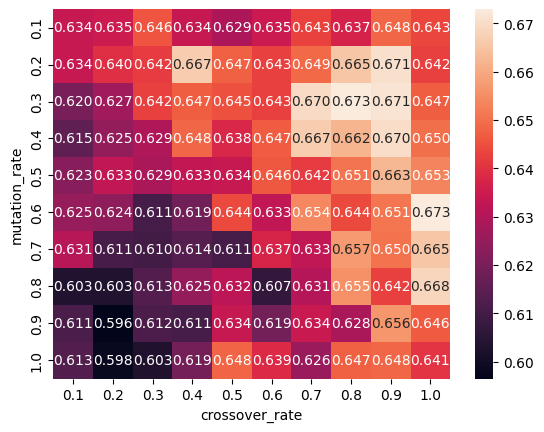

In [18]:
def plot_graph_de(df, nom_x, nom_y):

    eixo_x = np.trunc(df[nom_x] * 10) / 10.0
    eixo_y = np.trunc(df[nom_y] * 10)/ 10.0
    fitness = df['best_ind']
    dict_grafico = {
        nom_x: eixo_x,
        nom_y: eixo_y,
        'fitness': fitness
    }

    df_filtrado = pd.DataFrame(dict_grafico)
    df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
    sns.heatmap(data=df_pivot, annot=True, fmt=".3f")


plot_graph_de(df_sens_de, 'mutation_rate', 'crossover_rate')

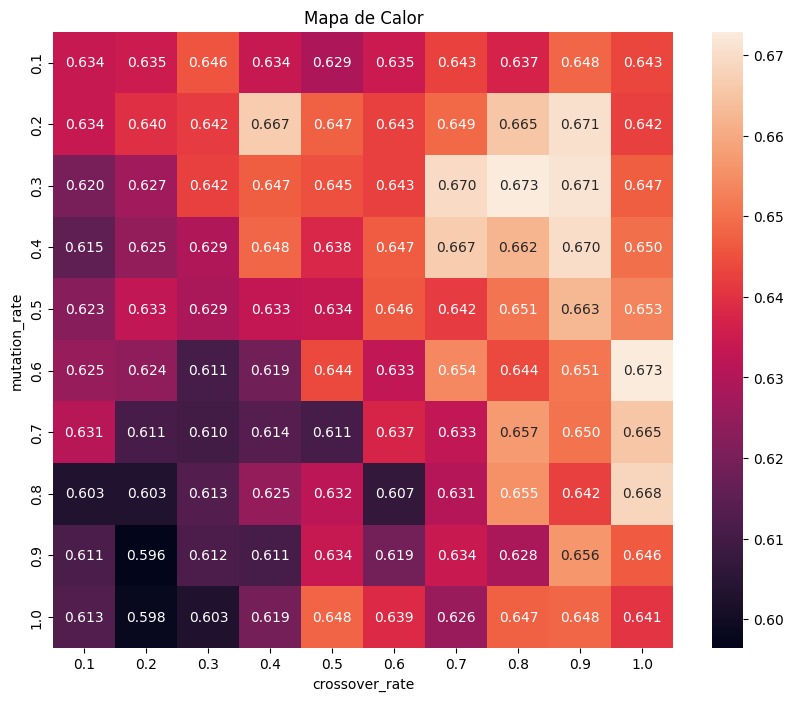

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_graph_de(df, nom_x, nom_y):

    eixo_x = np.trunc(df[nom_x] * 10) / 10.0
    eixo_y = np.trunc(df[nom_y] * 10)/ 10.0
    fitness = df['best_ind']
    dict_grafico = {
        nom_x: eixo_x,
        nom_y: eixo_y,
        'fitness': fitness
    }

    df_filtrado = pd.DataFrame(dict_grafico)
    df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])

    # Ajustar o tamanho da figura para aumentar os quadrados
    plt.figure(figsize=(10, 8))  # Ajuste os valores conforme necessário
    sns.heatmap(data=df_pivot, annot=True, fmt=".3f")

    # Ajustar outros aspectos da visualização aqui, se necessário
    plt.title("Mapa de Calor")
    plt.ylabel(nom_x)
    plt.xlabel(nom_y)

    plt.show()

# Exemplo de chamada da função (comente ou ajuste conforme seus dados)
plot_graph_de(df_sens_de, 'mutation_rate', 'crossover_rate')


- Crossover rate de melhor desempenenho é 0.9 conforme referênciia

# CMA-ES

In [16]:
path = 'simulations/cmaes_sensitivity.json'
parameters = ['mi', 'sigma']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.display_all()

Tabela de sensibilidade:


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0,0.0,0.0,1.0,248.359646
1,60,0,0.0,0.0,1.0,255.589477
2,100,0,0.0,0.0,1.0,257.728248
3,140,0,0.0,0.0,1.0,263.616873
4,180,0,0.0,0.0,1.0,266.857745
...,...,...,...,...,...,...
95,220,0,0.0,0.0,1.0,1256.339344
96,260,0,0.0,0.0,1.0,252.333042
97,300,0,0.0,0.0,1.0,256.815790
98,340,0,0.0,0.0,1.0,1226.014655


Melhor indivíduo


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0,0.0,0.0,1.0,248.359646
1,60,0,0.0,0.0,1.0,255.589477
2,100,0,0.0,0.0,1.0,257.728248
3,140,0,0.0,0.0,1.0,263.616873
4,180,0,0.0,0.0,1.0,266.857745
...,...,...,...,...,...,...
95,220,0,0.0,0.0,1.0,1256.339344
96,260,0,0.0,0.0,1.0,252.333042
97,300,0,0.0,0.0,1.0,256.815790
98,340,0,0.0,0.0,1.0,1226.014655


Melhor indivíduo médio


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0,0.0,0.0,1.0,248.359646
1,60,0,0.0,0.0,1.0,255.589477
2,100,0,0.0,0.0,1.0,257.728248
3,140,0,0.0,0.0,1.0,263.616873
4,180,0,0.0,0.0,1.0,266.857745
...,...,...,...,...,...,...
95,220,0,0.0,0.0,1.0,1256.339344
96,260,0,0.0,0.0,1.0,252.333042
97,300,0,0.0,0.0,1.0,256.815790
98,340,0,0.0,0.0,1.0,1226.014655


Parâmetros
{'mi': array([ 20,  60, 100, 140, 180, 220, 260, 300, 340, 380]), 'sigma': array([0])}


# DEPSO

In [8]:
path = 'simulations/depso_sensitivity.json'
parameters = ['global_factor', 'local_factor', 'v_max', 'mutation_rate', 'crossover_rate']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.display_all()
df_sens_depso = viz.df_sens

Tabela de sensibilidade:


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,5.5,0.2,0.5,0.564821,0.143373,5.0,146.519808
1,3.5,1.0,5.5,0.2,0.7,0.564821,0.143373,5.0,146.619486
2,3.5,1.0,5.5,0.2,0.9,0.564821,0.143373,5.0,146.582623
3,3.5,1.0,5.5,0.2,1.0,0.564821,0.143373,5.0,146.436483
4,3.5,1.0,5.5,0.4,0.5,0.564821,0.143373,5.0,146.650519
...,...,...,...,...,...,...,...,...,...
283,3.5,3.5,10.0,0.6,1.0,0.564821,0.163576,5.0,242.668438
284,3.5,3.5,10.0,0.8,0.5,0.657086,0.429608,203.0,241.374165
285,3.5,3.5,10.0,0.8,0.7,0.564821,0.163576,5.0,250.254845
286,3.5,3.5,10.0,0.8,0.9,0.564821,0.163576,5.0,236.810953


Melhor indivíduo


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
59,2.25,2.25,5.5,0.6,1.0,0.708226,0.385549,191.0,250.138393


Melhor indivíduo médio


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
104,3.5,2.25,5.5,0.6,0.5,0.655135,0.655135,187.0,235.541096


Parâmetros
{'global_factor': array([3.5 , 2.25, 1.  ]), 'local_factor': array([1.  , 2.25, 3.5 ]), 'v_max': array([ 5.5 ,  7.75, 10.  ]), 'mutation_rate': array([0.2, 0.4, 0.6, 0.8]), 'crossover_rate': array([0.5, 0.7, 0.9, 1. ])}


In [9]:
df_sens_depso = df_sens_depso.copy(deep=True)
# Trunca até 3 casas decimais
df_sens_depso['best_ind'] = df_sens_depso['best_ind'].apply(lambda x: round(x, 3))
df_sens_depso['avg_ind'] = df_sens_depso['avg_ind'].apply(lambda x: round(x, 3))
df_sens_depso['fitness_calls'] = df_sens_depso['fitness_calls'].astype(int)
df_sens_depso['total_time'] = df_sens_depso['total_time'].apply(lambda x: round(x, 3))
df_sens_depso['crossover_rate'] = df_sens_depso['crossover_rate'].apply(lambda x: round(x, 1))
df_sens_depso['mutation_rate'] = df_sens_depso['mutation_rate'].apply(lambda x: round(x, 1))
df_sens_depso['global_factor'] = df_sens_depso['global_factor'].apply(lambda x: round(x, 2))
df_sens_depso['local_factor'] = df_sens_depso['local_factor'].apply(lambda x: round(x, 2))
df_sens_depso['v_max'] = df_sens_depso['v_max'].apply(lambda x: round(x, 2))

df_sens_depso.to_csv('processed_tables/depso_sensitivity.csv', index=False)



# CMA-ES

In [5]:
path = 'simulations/cmaes_sensitivity.json'
parameters = ['mi', 'sigma']
viz_cames = SensVisualizer(file_path=path, parameters=parameters)
viz_cames.display_all()
df_sens_cmaes = viz.df_sens



Tabela de sensibilidade:


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,1,0.20,0.5,0.5,6.0,108.844041
1,2,0.20,0.5,0.5,5.0,85.567426
2,3,0.20,0.5,0.5,7.0,86.810997
3,4,0.20,0.5,0.5,5.0,84.489417
4,5,0.20,0.5,0.5,8.0,91.591383
...,...,...,...,...,...,...
95,10,0.75,0.5,0.5,4.0,85.612529
96,20,0.75,0.5,0.5,6.0,105.210721
97,100,0.75,0.5,0.5,7.0,111.615084
98,200,0.75,0.5,0.5,6.0,111.216327


Melhor indivíduo


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
65,10,0.6,0.631881,0.578733,100.0,108.523227


Melhor indivíduo médio


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
12,3,0.25,0.630862,0.630862,43.0,108.55324


Parâmetros
{'mi': array([  1,   2,   3,   4,   5,  10,  20, 100, 200, 300]), 'sigma': array([0.2 , 0.25, 0.3 , 0.35, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75])}


In [6]:
df_sens_cmaes.tail(50)

,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
50,1,0.55,0.584859,0.584859,40.0,118.305340
51,2,0.55,0.593060,0.593060,37.0,132.900218
52,3,0.55,0.616546,0.565848,100.0,113.230200
53,4,0.55,0.603854,0.562832,100.0,126.186108
54,5,0.55,0.610336,0.603797,96.0,117.304243
55,10,0.55,0.506801,0.225860,1.0,96.489476
56,20,0.55,0.506801,0.225860,1.0,113.167642
57,100,0.55,0.506801,0.225860,1.0,99.507399
58,200,0.55,0.506801,0.225860,1.0,99.212203
59,300,0.55,0.506801,0.225860,1.0,99.553342


In [7]:
df_sens_cmaes.count()

mi               100
sigma            100
best_ind         100
avg_ind          100
fitness_calls    100
total_time       100
dtype: int64

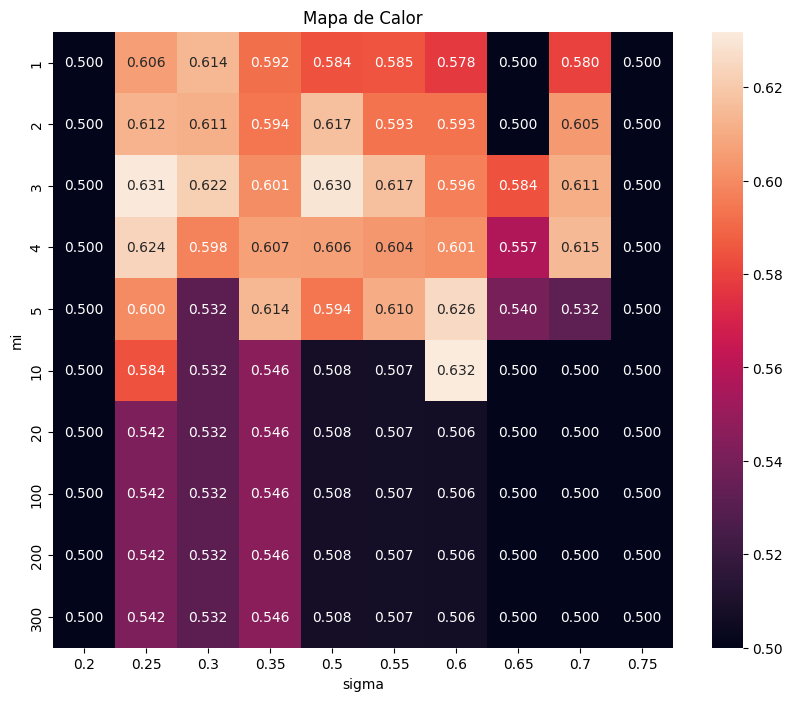

In [10]:
def plot_graph_cmaes(df, nom_x, nom_y):

    #eixo_x = np.trunc(df[nom_x] * 10) / 10.0
    #eixo_y = np.trunc(df[nom_y] * 10)/ 10.0
    fitness = df['best_ind']
    dict_grafico = {
        nom_x: df[nom_x].values,
        nom_y: df[nom_y].values,
        'fitness': fitness
    }

    df_filtrado = pd.DataFrame(dict_grafico)
    df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])

    # Ajustar o tamanho da figura para aumentar os quadrados
    plt.figure(figsize=(10, 8))  # Ajuste os valores conforme necessário
    sns.heatmap(data=df_pivot, annot=True, fmt=".3f")

    # Ajustar outros aspectos da visualização aqui, se necessário
    plt.title("Mapa de Calor")
    plt.ylabel(nom_x)
    plt.xlabel(nom_y)

    plt.show()


plot_graph_cmaes(df_sens_cmaes, 'mi', 'sigma')

In [12]:
df_sens_cmaes_csv = df_sens_cmaes.copy(deep=True)
# Trunca até 3 casas decimais
df_sens_cmaes_csv['best_ind'] = df_sens_cmaes_csv['best_ind'].apply(lambda x: round(x, 3))
df_sens_cmaes_csv['avg_ind'] = df_sens_cmaes_csv['avg_ind'].apply(lambda x: round(x, 3))
df_sens_cmaes_csv['fitness_calls'] = df_sens_cmaes_csv['fitness_calls'].astype(int)
df_sens_cmaes_csv['total_time'] = df_sens_cmaes_csv['total_time'].apply(lambda x: round(x, 3))
df_sens_cmaes_csv['mi'] = df_sens_cmaes_csv['mi'].astype(int)
df_sens_cmaes_csv['sigma'] = df_sens_cmaes_csv['sigma'].apply(lambda x: round(x, 2))
df_sens_cmaes_csv.to_csv('processed_tables/cmaes_sensitivity.csv', index=False)



In [4]:
path = 'simulations/depso_sensitivity.json'
parameters = ['global_factor', 'local_factor', 'v_max', 'mutation_rate', 'crossover_rate']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.display_all()
df_sens_depso = viz.df_sens

Tabela de sensibilidade:


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,5.5,0.2,0.5,0.564821,0.143373,5.0,146.519808
1,3.5,1.0,5.5,0.2,0.7,0.564821,0.143373,5.0,146.619486
2,3.5,1.0,5.5,0.2,0.9,0.564821,0.143373,5.0,146.582623
3,3.5,1.0,5.5,0.2,1.0,0.564821,0.143373,5.0,146.436483
4,3.5,1.0,5.5,0.4,0.5,0.564821,0.143373,5.0,146.650519
...,...,...,...,...,...,...,...,...,...
283,3.5,3.5,10.0,0.6,1.0,0.564821,0.163576,5.0,242.668438
284,3.5,3.5,10.0,0.8,0.5,0.657086,0.429608,203.0,241.374165
285,3.5,3.5,10.0,0.8,0.7,0.564821,0.163576,5.0,250.254845
286,3.5,3.5,10.0,0.8,0.9,0.564821,0.163576,5.0,236.810953


Melhor indivíduo


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
59,2.25,2.25,5.5,0.6,1.0,0.708226,0.385549,191.0,250.138393


Melhor indivíduo médio


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
104,3.5,2.25,5.5,0.6,0.5,0.655135,0.655135,187.0,235.541096


Parâmetros
{'global_factor': array([3.5 , 2.25, 1.  ]), 'local_factor': array([1.  , 2.25, 3.5 ]), 'v_max': array([ 5.5 ,  7.75, 10.  ]), 'mutation_rate': array([0.2, 0.4, 0.6, 0.8]), 'crossover_rate': array([0.5, 0.7, 0.9, 1. ])}


#DEPSO

/tmp/ipykernel_1065329/1462218417.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'best_ind': 'fitness'}, inplace=True)
/tmp/ipykernel_1065329/1462218417.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fitness Group'] = pd.cut(df['fitness'], intervalos, include_lowest=True, right=False)
/tmp/ipykernel_1065329/1462218417.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

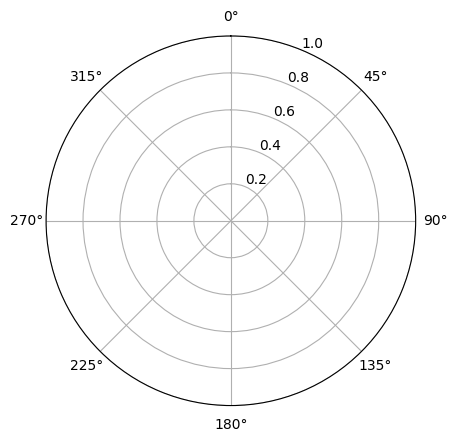

In [11]:
# Faz a visualização do DEPSO utilizando um gráfico de radar, de modo a a que o valor de fitness fique no centro pois ele é o mais importante
# Os outros parâmetros ficam em volta do gráfico de radar, de modo a facilitar a visualização
# O gráfico de radar é feito com a biblioteca plotly
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from math import pi


def plot_graph_depso(df, nom_x, nom_y, nom_z, nom_u, nom_v):
    # Cria um gráfico de radar com os parâmetros passados a partir do dataframe df, sendo fitness o campo central
    # nom_x, nom_y, nom_z, nom_u e nom_v são os nomes dos campos do dataframe que serão utilizados
    # nom_x, nom_y, nom_z, nom_u e nom_v devem ser strings
    # df deve ser um dataframe
    
    # Filtra o dataframe
    df = df[[nom_x, nom_y, nom_z, nom_u, nom_v, 'best_ind']]
    df.rename(columns={'best_ind': 'fitness'}, inplace=True)

    # Cria intervalos de fitness
    intervalos = np.arange(0.5, 0.7, 0.1)
    df['Fitness Group'] = pd.cut(df['fitness'], intervalos, include_lowest=True, right=False)

    # Calcula a média para cada grupo
    grouped = df.groupby('Fitness Group').mean()

    # Número de variáveis
    categories = list(df.columns[:-2])
    N = len(categories)

    # Ângulos para os parâmetros
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Inicializa o gráfico de radar
    ax = plt.subplot(111, polar=True)

    # Fecha o gráfico
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Desenha um por um
    for i, row in grouped.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Fitness {i}')

    # Adiciona atributos
    plt.xticks(angles[:-1], categories)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
    plt.ylim(0,1)

    # Adiciona legenda
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()
    

plot_graph_depso(df_sens_depso, 'global_factor', 'local_factor', 'v_max', 'mutation_rate', 'crossover_rate')
    

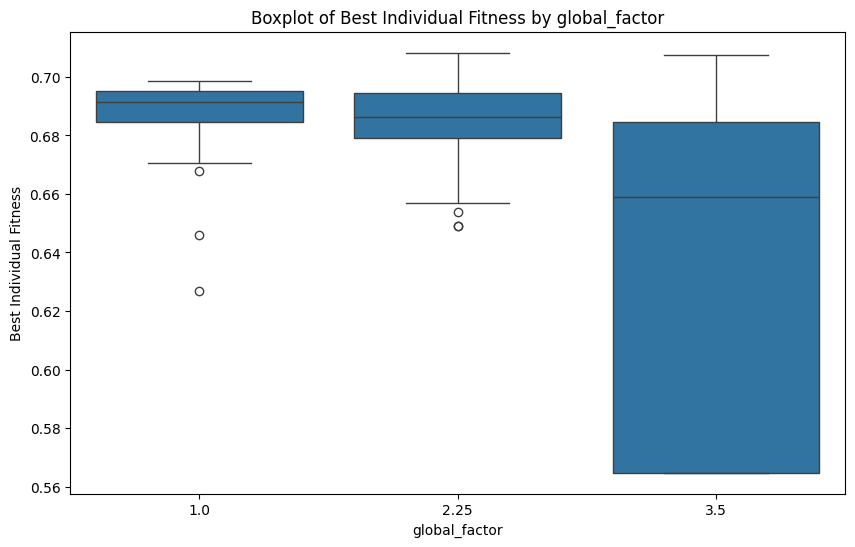

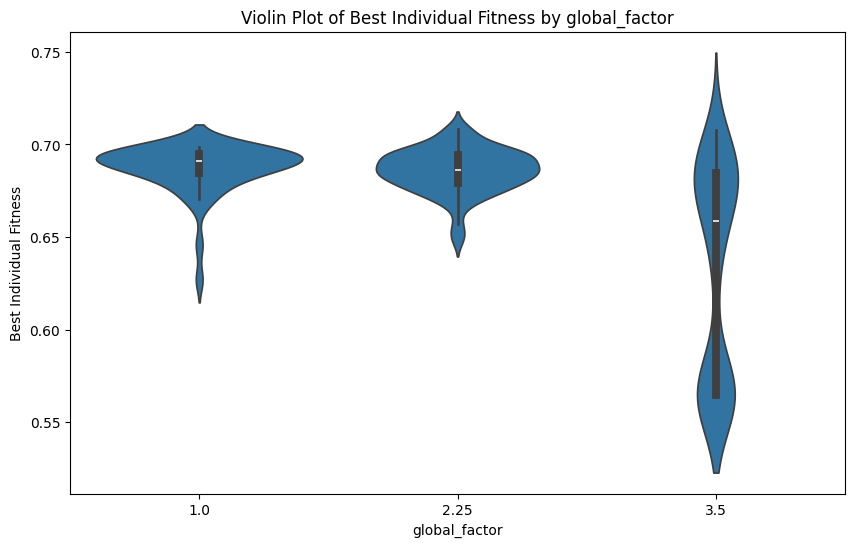

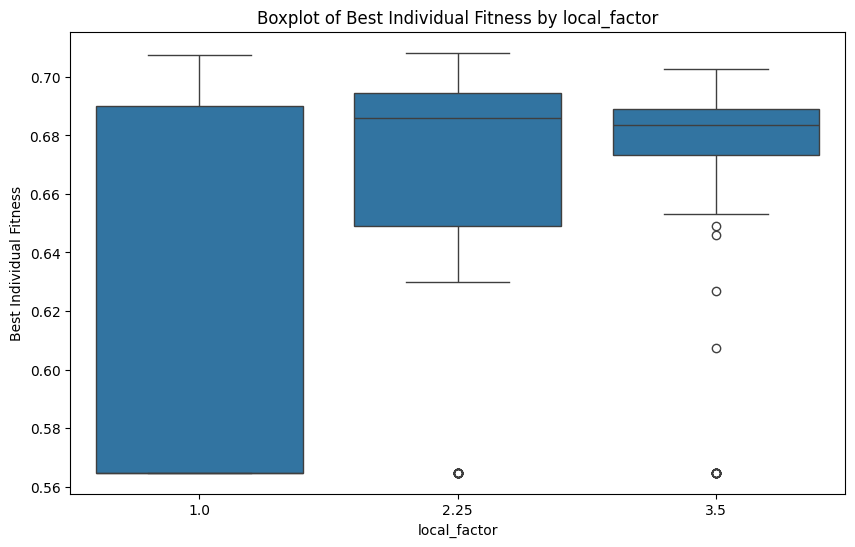

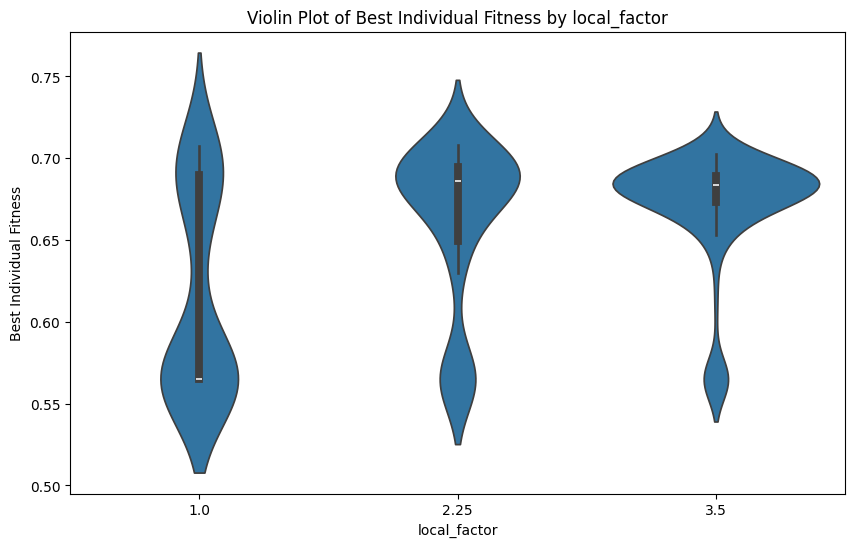

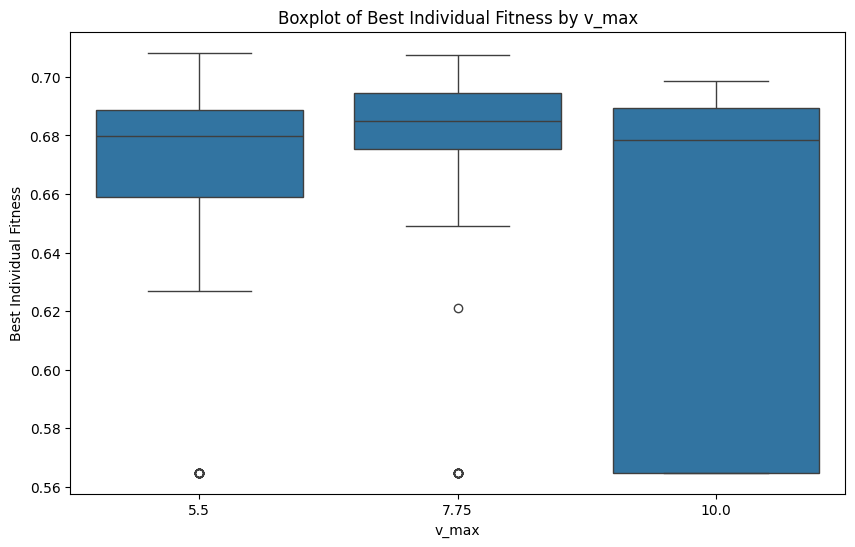

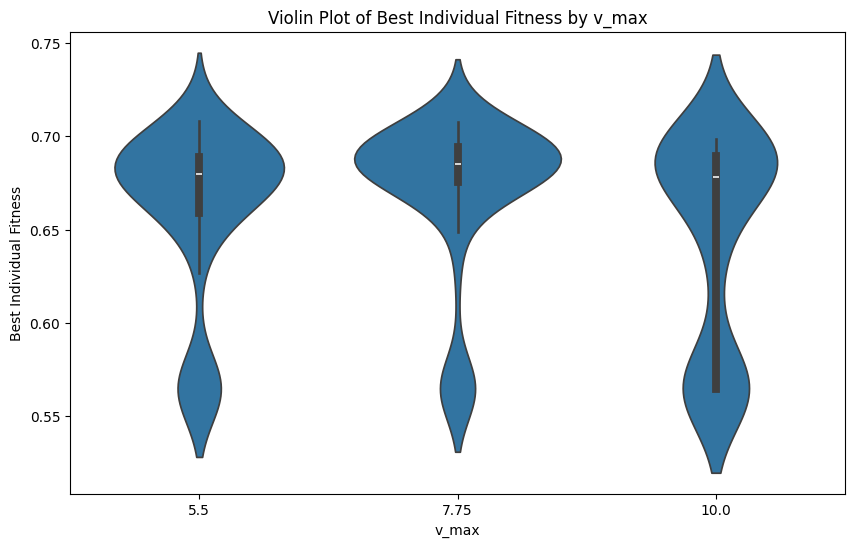

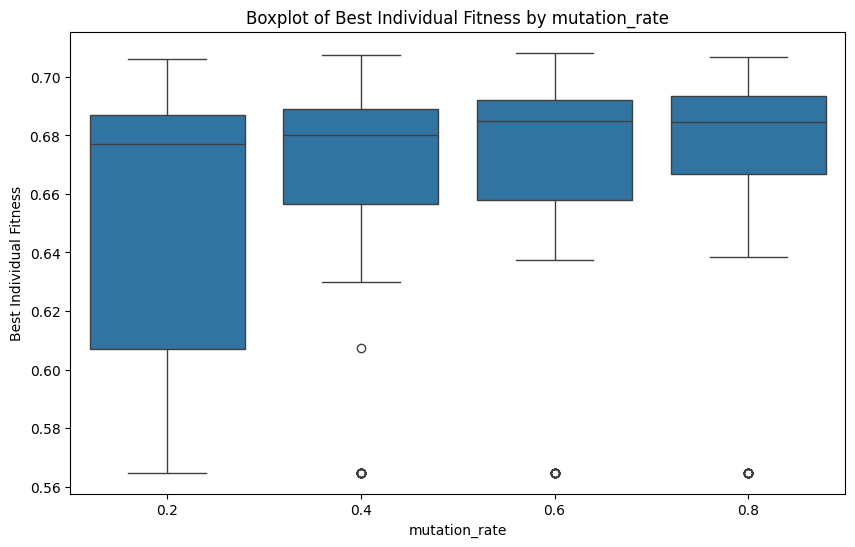

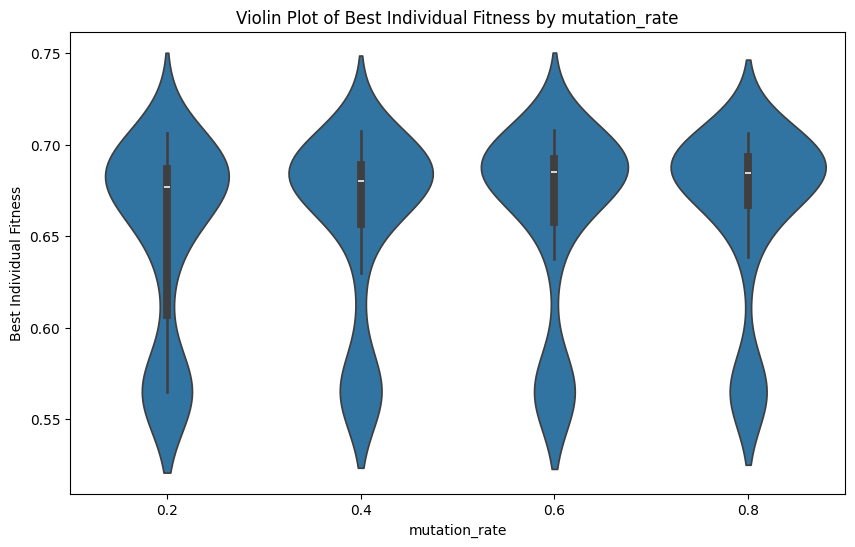

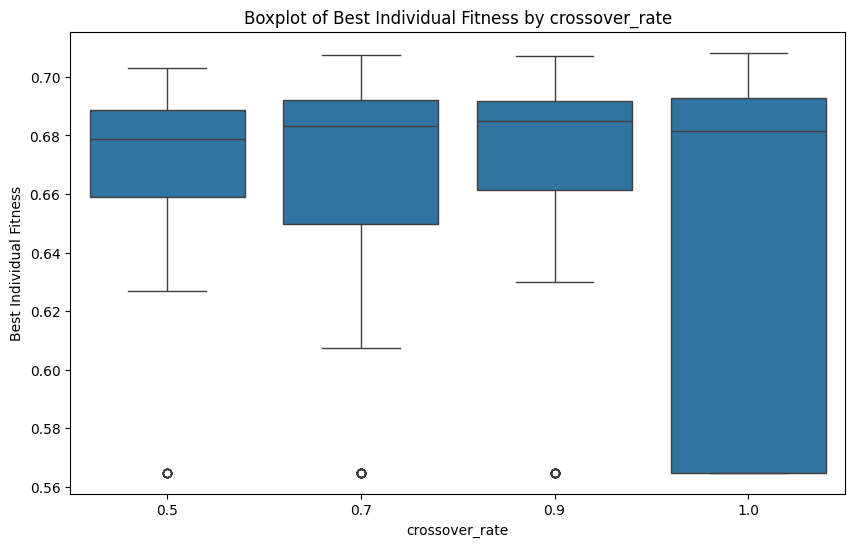

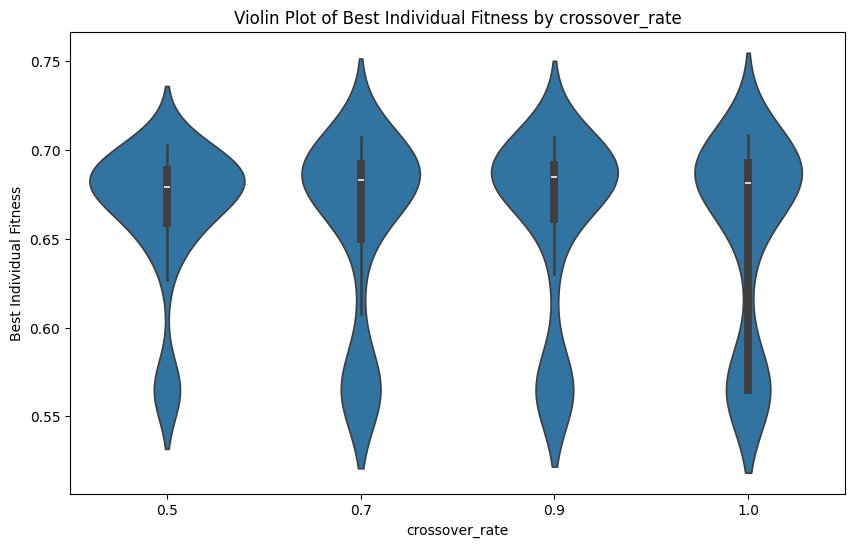

In [6]:
df = df_sens_depso.copy(deep=True)

# Lista dos hiperparâmetros
hyperparameters = ['global_factor', 'local_factor', 'v_max', 'mutation_rate', 'crossover_rate']

# Criando boxplots e violin plots
for param in hyperparameters:
    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[param], y=df['best_ind'])
    plt.title(f'Boxplot of Best Individual Fitness by {param}')
    plt.xlabel(param)
    plt.ylabel('Best Individual Fitness')
    plt.show()

    # Violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=df[param], y=df['best_ind'])
    plt.title(f'Violin Plot of Best Individual Fitness by {param}')
    plt.xlabel(param)
    plt.ylabel('Best Individual Fitness')
    plt.show()


In [ ]:
import plotl

# opt-aiNet

In [6]:
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

dict_optainet_sens = read_json('simulations/optainet_new_sensitivity.json')

In [7]:
# procura na lista qual dos itens (dicionário) possui um total_time maior que 0
for item in dict_optainet_sens:
    if item['total_time'] > 0:
        print(item)
        break

{'nc': 2, 'beta': 10.0, 'clone_threshold': 0.05, 'supression_threshold': 0.8, 'newcomers_percentage': 0.1, 'fitness_calls': [157.0, 282.0, 408.0, 543.0, 668.0, 801.0, 945.0, 1096.0, 1252.0, 1422.0, 1586.0, 1735.0, 1876.0, 2000.0, 2091.0, 2176.0, 2258.0, 2334.0, 2433.0, 2529.0, 2651.0, 2774.0, 2896.0, 3027.0, 3151.0, 3290.0, 3424.0, 3541.0, 3664.0, 3802.0, 3972.0, 4139.0, 4275.0, 4379.0, 4493.0, 4623.0, 4706.0, 4825.0, 4950.0, 5298.0, 5449.0, 5590.0, 5720.0, 5853.0, 5988.0, 6119.0, 6225.0, 6365.0, 6513.0, 6664.0, 6800.0, 6914.0, 7052.0, 7199.0, 7353.0, 7518.0, 7687.0, 7831.0, 7962.0, 8089.0, 8394.0, 8533.0, 8693.0, 8846.0, 8954.0, 9096.0, 9224.0, 9338.0, 9465.0, 9586.0, 9734.0, 9885.0, 10032.0, 10181.0, 10325.0, 10466.0, 10632.0, 10792.0, 10984.0, 11156.0, 11354.0, 11568.0, 11744.0, 11918.0, 12075.0, 12208.0, 12333.0, 12485.0, 12625.0, 12771.0, 12897.0, 13043.0, 13211.0, 13352.0, 13479.0, 13631.0, 13798.0, 13967.0, 14146.0, 14311.0], 'best_ind_list': [0.5, 0.5, 0.5361282721360184, 0.538

In [8]:
# Lê o arquivo JSON
path = 'simulations/optainet_new_sensitivity.json'
parameters = ['nc', 'beta', 'clone_threshold', 'supression_threshold', 'newcomers_percentage']
viz_optainet = SensVisualizer(file_path=path, parameters=parameters)
viz_optainet.display_all()
df_sens_optainet = viz_optainet.df_sens

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [13]:
dict_optainet_sens

[{'nc': 2,
  'beta': 10.0,
  'clone_threshold': 0.05,
  'supression_threshold': 0.4,
  'newcomers_percentage': 0.1,
  'fitness_calls': 0,
  'best_ind_list': 0,
  'avg_ind_list': 0,
  'best_solutions': 0,
  'total_time': 0},
 {'nc': 2,
  'beta': 10.0,
  'clone_threshold': 0.05,
  'supression_threshold': 0.4,
  'newcomers_percentage': 0.2,
  'fitness_calls': 0,
  'best_ind_list': 0,
  'avg_ind_list': 0,
  'best_solutions': 0,
  'total_time': 0},
 {'nc': 2,
  'beta': 10.0,
  'clone_threshold': 0.05,
  'supression_threshold': 0.4,
  'newcomers_percentage': 0.4,
  'fitness_calls': 0,
  'best_ind_list': 0,
  'avg_ind_list': 0,
  'best_solutions': 0,
  'total_time': 0},
 {'nc': 2,
  'beta': 10.0,
  'clone_threshold': 0.05,
  'supression_threshold': 0.8,
  'newcomers_percentage': 0.1,
  'fitness_calls': [157.0,
   282.0,
   408.0,
   543.0,
   668.0,
   801.0,
   945.0,
   1096.0,
   1252.0,
   1422.0,
   1586.0,
   1735.0,
   1876.0,
   2000.0,
   2091.0,
   2176.0,
   2258.0,
   2334.0,
   2

In [3]:
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

dict_optainet_sens = read_json('simulations/optainet_new_sensitivity.json')

# printa tabela do opt-aiNet a partir do dicitonário

row_list = []

for line in dict_optainet_sens:
#line = dict_optainet_sens[50]

    nc = line['nc']
    beta = line['beta']
    clone_threshold = line['clone_threshold']
    supression_threshold = line['supression_threshold']
    newcomers_percentage = line['newcomers_percentage']

    fitness_calls = line['fitness_calls']
    best_ind = line['best_ind_list']
    avg_ind = line['avg_ind_list']
    total_time = line['total_time']

    best_fitness = 0

    # Caso best_ind for um inteiro, transforma em lista
    if isinstance(best_ind, int):
        best_ind = [best_ind]
    if isinstance(avg_ind, int):
        avg_ind = [avg_ind]
    if isinstance(fitness_calls, int):
        fitness_calls = [fitness_calls]

    for item in zip(fitness_calls, best_ind, avg_ind):
        if item[1] >= best_fitness:
            best_fitness = item[1]
            best_fitness_calls = item[0]
            best_avg_ind = item[2]

    dict_row = {
        'nc': nc,
        'beta': beta,
        'clone_threshold': clone_threshold,
        'supression_threshold': supression_threshold,
        'newcomers_percentage': newcomers_percentage,
        'fitness_calls': best_fitness_calls,
        'best_ind': best_fitness,
        'avg_ind': best_avg_ind,
        'total_time': total_time
    }

    row_list.append(dict_row)

df_optainet = pd.DataFrame(row_list)
df_optainet


,nc,beta,clone_threshold,supression_threshold,newcomers_percentage,fitness_calls,best_ind,avg_ind,total_time
0,2,10.0,0.05,0.4,0.1,0.0,0.000000,0.000000,0.000000
1,2,10.0,0.05,0.4,0.2,0.0,0.000000,0.000000,0.000000
2,2,10.0,0.05,0.4,0.4,0.0,0.000000,0.000000,0.000000
3,2,10.0,0.05,0.8,0.1,14311.0,0.619251,0.475106,37.586691
4,2,10.0,0.05,0.8,0.2,26215.0,0.650660,0.441792,51.762934
...,...,...,...,...,...,...,...,...,...
238,8,1000.0,3.00,0.8,0.2,65239.0,0.571227,0.395699,98.193255
239,8,1000.0,3.00,0.8,0.4,80086.0,0.608462,0.398909,117.074500
240,8,1000.0,3.00,2.0,0.1,0.0,0.000000,0.000000,0.000000
241,8,1000.0,3.00,2.0,0.2,0.0,0.000000,0.000000,0.000000


In [4]:
df_optainet.loc[df_optainet['best_ind'] == df_optainet['best_ind'].max()]

,nc,beta,clone_threshold,supression_threshold,newcomers_percentage,fitness_calls,best_ind,avg_ind,total_time
59,8,10.0,0.05,0.8,0.4,173632.0,0.687603,0.476003,202.636483
68,8,10.0,0.15,0.8,0.4,173632.0,0.687603,0.476003,228.087077


In [7]:
df_optainet_csv = df_optainet.copy(deep=True)
# Trunca até 3 casas decimais
df_optainet_csv['best_ind'] = df_optainet_csv['best_ind'].apply(lambda x: round(x, 3))
df_optainet_csv['avg_ind'] = df_optainet_csv['avg_ind'].apply(lambda x: round(x, 3))
df_optainet_csv['fitness_calls'] = df_optainet_csv['fitness_calls'].astype(int)
df_optainet_csv['total_time'] = df_optainet_csv['total_time'].apply(lambda x: round(x, 3))
df_optainet_csv['nc'] = df_optainet_csv['nc'].astype(int)
df_optainet_csv['beta'] = df_optainet_csv['beta'].astype(int)

df_optainet_csv['clone_threshold'] = df_optainet_csv['clone_threshold'].apply(lambda x: round(x, 2))

df_optainet_csv['supression_threshold'] = df_optainet_csv['supression_threshold'].apply(lambda x: round(x, 1))
df_optainet_csv['newcomers_percentage'] = df_optainet_csv['newcomers_percentage'].apply(lambda x: round(x, 1))

# No caso de clone_threshold for 3, trocar por 0.3
df_optainet_csv['clone_threshold'] = df_optainet_csv['clone_threshold'].apply(lambda x: 0.3 if x == 3 else x)
#df_optainet_csv
#df_optainet_csv.to_csv('processed_tables/opainet_sensitivity.csv', index=False)



In [8]:
# Calcula a correlacao entre os parâmetros e o melhor fitness
df_optainet_csv.corr()['best_ind'].sort_values(ascending=False) 


best_ind                1.000000
avg_ind                 0.973564
total_time              0.730231
fitness_calls           0.648898
clone_threshold         0.077752
newcomers_percentage    0.017722
supression_threshold   -0.005457
beta                   -0.135367
nc                     -0.147034
Name: best_ind, dtype: float64

In [12]:
# Calcula a correlacao entre os parâmetros e o melhor fitness
df_optainet_csv.loc[df_optainet_csv['total_time'] > 0].corr()['best_ind'].sort_values(ascending=False) 


best_ind                1.000000
nc                      0.350291
avg_ind                 0.332645
newcomers_percentage    0.289329
fitness_calls           0.087040
total_time              0.069449
supression_threshold   -0.061393
clone_threshold        -0.374556
beta                   -0.622460
Name: best_ind, dtype: float64

In [14]:
# Calcula a correlacao entre os parâmetros e o melhor fitness
df_optainet_csv.loc[df_optainet_csv['total_time'] == 0].corr()['best_ind'].sort_values(ascending=False) 


nc                     NaN
beta                   NaN
clone_threshold        NaN
supression_threshold   NaN
newcomers_percentage   NaN
fitness_calls          NaN
best_ind               NaN
avg_ind                NaN
total_time             NaN
Name: best_ind, dtype: float64

In [11]:
df_optainet_csv.mean(axis=0)

nc                          4.666667
beta                      370.000000
clone_threshold             0.166667
supression_threshold        1.066667
newcomers_percentage        0.233333
fitness_calls           19231.942387
best_ind                    0.206765
avg_ind                     0.154214
total_time                 29.484568
dtype: float64

In [10]:
df_optainet_csv.loc[df_optainet['total_time'] == 0].mean(axis=0)

nc                        4.956522
beta                    404.658385
clone_threshold           0.159627
supression_threshold      1.068323
newcomers_percentage      0.232919
fitness_calls             0.000000
best_ind                  0.000000
avg_ind                   0.000000
total_time                0.000000
dtype: float64

In [13]:
df_optainet_csv.loc[df_optainet['total_time'] > 0].mean(axis=0)

nc                          4.097561
beta                      301.951220
clone_threshold             0.180488
supression_threshold        1.063415
newcomers_percentage        0.234146
fitness_calls           56992.219512
best_ind                    0.612732
avg_ind                     0.457000
total_time                 87.375000
dtype: float64

In [15]:
df_optainet_csv.loc[df_optainet['total_time'] > 0].shape

(82, 9)

In [16]:
df_optainet_csv.loc[df_optainet['total_time'] == 0].shape

(161, 9)